<IPython.core.display.Javascript object>


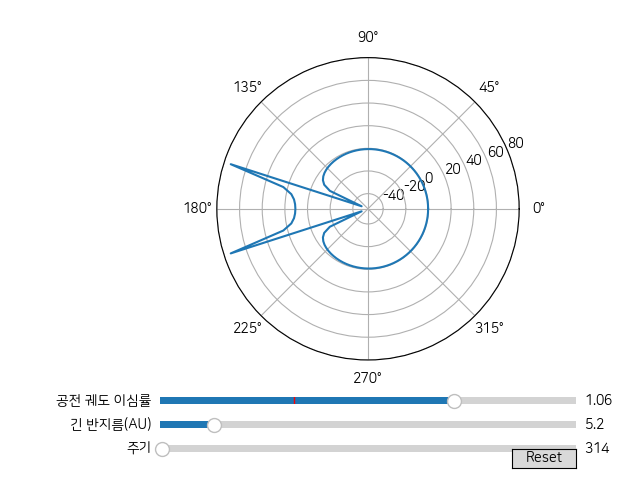

In [22]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from scipy.optimize import newton
from matplotlib.widgets import Slider, Button

fig, ax = plt.subplots()

#변수 설정
first_run = True

if 'a' in globals():
    first_run = False
if first_run:
    e = 0.017
    a = 1
    T = 3.65

#슬라이더 생성
plt.subplots_adjust(left=.25, bottom=.25)
t = np.arange(0.0, 1.0, 0.001) 
e_slider = plt.axes([0.25, 0.15, 0.65, 0.03])
s_major_slider = plt.axes([0.25, 0.1, 0.65, 0.03])
t_slider = plt.axes([0.25, 0.05, 0.65, 0.03])
e_val = Slider(e_slider, '공전 궤도 이심률', 0, 1.5, valinit=e)
m_val = Slider(s_major_slider, '긴 반지름(AU)', 0, 40.0, valinit=a)
t_val = Slider(t_slider, "주기", 1, 60000.0, valinit=T*100)
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.5')  

#슬라이더 값 변경
def update(val):
    global e, a, T
    e = e_val.val
    a = m_val.val
    T = t_val.val / 100
    _theta = np.linspace(0, 2*np.pi, 101)
    _r = a*(1-e**2) / (1+e*np.cos(_theta))
    fig.canvas.draw_idle()
    plplot.cla()

    _angle = np.linspace(0, 2*np.pi, 101)
    _r = a*(1-e**2) / (1+e*np.cos(_theta))
 
    plplot.plot(_angle, _r)
 
    vehicle, = plplot.plot([], [], 'ro')

    rc('animation', html='html5')

    anim = animation.FuncAnimation(fig, animate, frames=360, blit=True, interval=30)

    anim
    
e_val.on_changed(update)
m_val.on_changed(update)
t_val.on_changed(update)
    
#리셋 버튼
def reset(event):
    global e, a, T
    e = 0.017
    a = 1
    T = 3.65
    
button.on_clicked(reset) 

#운동 시뮬레이션
def animate(i):
    #프레임 수가 50 곱해져있음
    t = i/50
    M = 2*np.pi*t / T
    E = newton(lambda E: E-e*np.sin(E)-M, M)
 
    angle = 2 * np.arctan(np.sqrt((1+e)/(1-e)) * np.tan(E/2))
    r = a * (1-e*np.cos(E))
 
    vehicle.set_data(angle, r)
    return vehicle

plplot = plt.subplot(polar=True)

_angle = np.linspace(0, 2*np.pi, 101)
_r = a*(1-e**2) / (1+e*np.cos(_angle))
 
plplot.plot(_angle, _r)
 
vehicle, = plplot.plot([], [], 'ro')

rc('animation', html='html5')

fig.canvas.draw_idle()
anim = animation.FuncAnimation(fig, animate, frames=int(T/0.02), blit=True, interval=20)

anim

plt.show()

In [17]:
#한글 폰트 깨지면
import matplotlib.font_manager as fm
plt.rc('font', family="NanumSquareRound")
plt.rc('axes', unicode_minus=False)